In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import plotly.express as px

from src.models.qsar_OLS_pca import *
from src.utils.plotting_pred_utils import *

import warnings
from rdkit import RDLogger

# Suppress Pandas warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

# Suppress RDKit warnings
RDLogger.DisableLog("rdApp.*")

In [2]:
fam_1 = ['CDK3-G1/S-CycE1', 'CDK6-G1/S-CycD1[L188C]', 'CDK5-Act1[99-307]', 'CDK5-Act1', 'CDK7-CycH', 'CDK7']
fam_3 = ['CDK9', 'CDK4-G1/S-CycD1', 'CDK4-G1/S-CycD1[L188C]', 'CDK4', 'CDK6-G1/S-CycD3', 'CDK6']
fam_4 = ['CDK9-CycT1', 'CDK11A', 'CDK11B']
fam_6 = ['CDK5', 'CDK1-G2/M-Cyc1', 'CDK1', 'CDK1-CycA2', 'CDK1-G2/M-CycB', 'CDK3', 'CDK2[A144G]', 'CDK2[F80T]', 'CDK2[C118L,A144C]', 'CDK2[A144C]', 'CDK2', 'CDK2-CycA2[171-432]', 'CDK2-G1/S-CycE1', 'CDK2-CycA2', 'CDK2-CycA2[177-432]', 'CDK2[F80M]', 'CDK2-G1/S-CycE1-GSTP', 'CDK2-CycA1', 'CDK2[C118L]', 'CDK2[C118I]']

families = [fam_1, fam_3, fam_4, fam_6]

In [3]:

df_fam = pd.read_csv("src/data/CDK_cleaned_for_families_prediction.csv")

Family: ['CDK3-G1/S-CycE1', 'CDK6-G1/S-CycD1[L188C]', 'CDK5-Act1[99-307]', 'CDK5-Act1', 'CDK7-CycH', 'CDK7']
[0 0 0 ... 0 0 0]
R2 of the original model:  0.6241875573383258
R2 of the shuffled model:  0.4294850240241995
RMSE of the original model:  1.4378384244191096
RMSE of the shuffled model:  1.7715688383070063


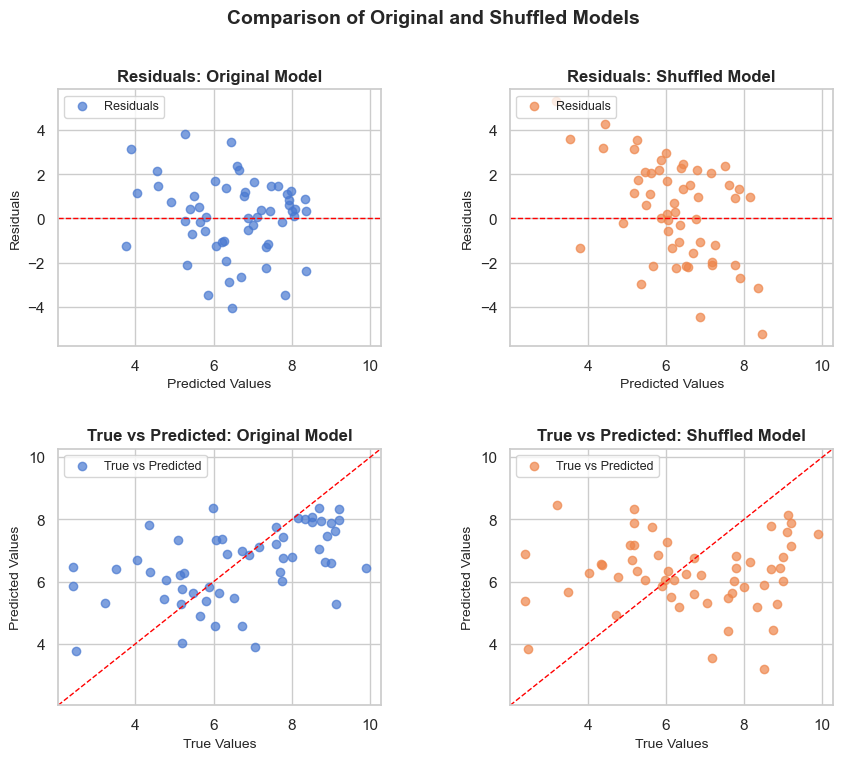

Family: ['CDK9', 'CDK4-G1/S-CycD1', 'CDK4-G1/S-CycD1[L188C]', 'CDK4', 'CDK6-G1/S-CycD3', 'CDK6']
[0 0 0 ... 0 0 0]
R2 of the original model:  0.6898261186619338
R2 of the shuffled model:  0.16352833176339032
RMSE of the original model:  1.3280285962608969
RMSE of the shuffled model:  2.1808732838008043


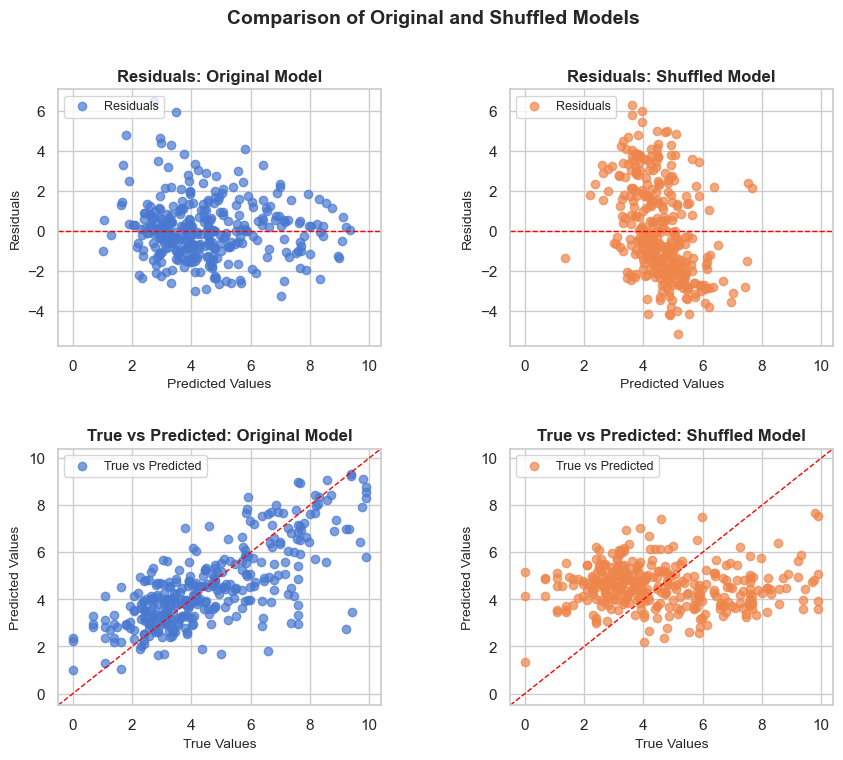

Family: ['CDK9-CycT1', 'CDK11A', 'CDK11B']
[0 0 0 ... 0 0 0]
R2 of the original model:  0.7796550135454332
R2 of the shuffled model:  0.16635835740791072
RMSE of the original model:  0.7448593697004331
RMSE of the shuffled model:  1.4488132156305615


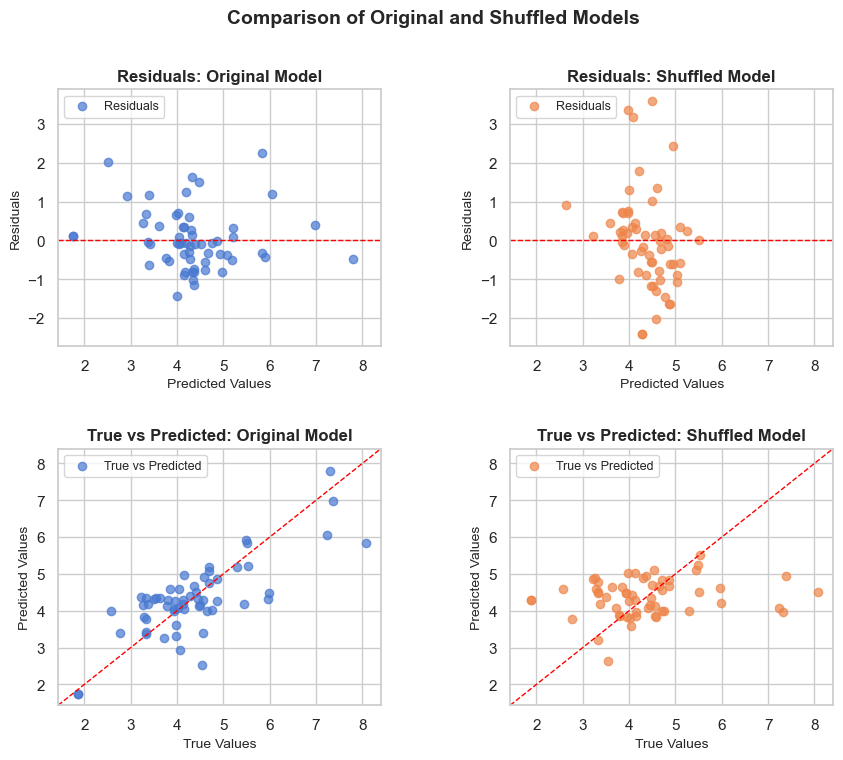

Family: ['CDK5', 'CDK1-G2/M-Cyc1', 'CDK1', 'CDK1-CycA2', 'CDK1-G2/M-CycB', 'CDK3', 'CDK2[A144G]', 'CDK2[F80T]', 'CDK2[C118L,A144C]', 'CDK2[A144C]', 'CDK2', 'CDK2-CycA2[171-432]', 'CDK2-G1/S-CycE1', 'CDK2-CycA2', 'CDK2-CycA2[177-432]', 'CDK2[F80M]', 'CDK2-G1/S-CycE1-GSTP', 'CDK2-CycA1', 'CDK2[C118L]', 'CDK2[C118I]']
[0 0 0 ... 0 0 0]
R2 of the original model:  0.7787872547014845
R2 of the shuffled model:  0.1118650416023318
RMSE of the original model:  1.2577898244848238
RMSE of the shuffled model:  2.5202434034643595


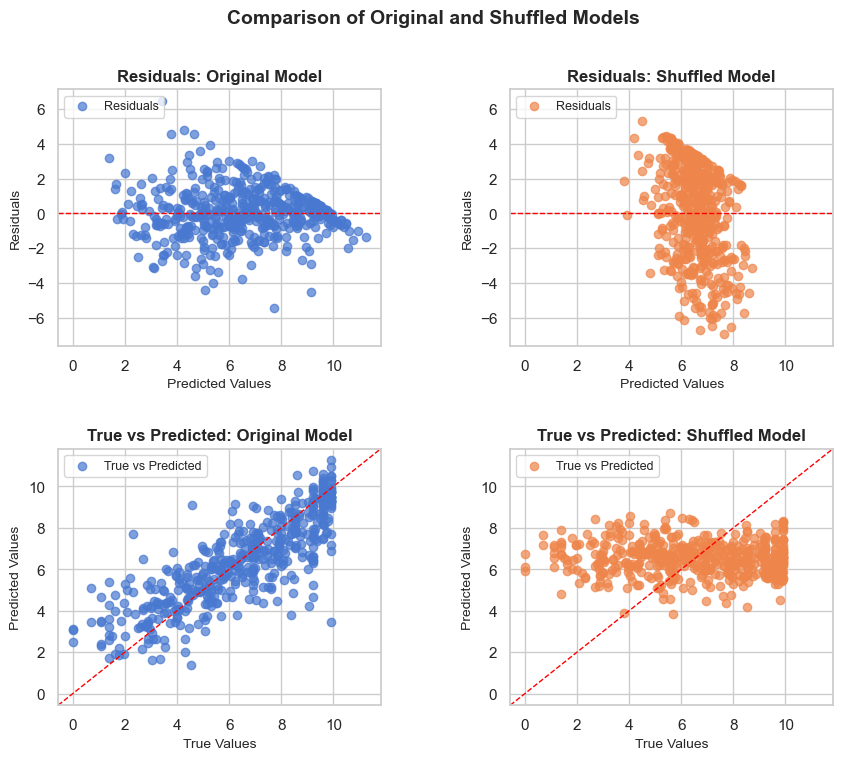

In [5]:

for fam in families:
    print(f"Family: {fam}")
    model, X_train, X_test, y_train, y_test, scaler, pca = create_model(df_fam, fam, random_state=42)
    compare_cdkmodel_and_shuffled(model, y_train=y_train, X_train=X_train, y_test=y_test, X_test=X_test)